## **Module - 4 : Python Integration Primer**

Graphical User interface, **Networking in Python**, Python database connectivity, Introduction to Django

# **1. Use 'netstat' to view active network connections**

* Type the commnad on Command Prompt (Windows) / Terminal (Linux)
>> netstat -a

# **2. Using Telnet to make a direct connection to web service**

* [Enable Telnet Service](https://social.technet.microsoft.com/wiki/contents/articles/38433.windows-10-enabling-telnet-client.aspx)
* Type the commnad on Command Prompt (Windows) / Terminal (Linux)

>> telnet www.python.org 80

# **3. TCP Client to send a HTTP request to Server with Python Soecket**

b'HTTP/1.1 400 Bad Request\r\nDate: Wed, 09 Mar 2022 06:18:16 GMT\r\nServer: Apache\r\nAccept-Ranges: bytes\r\nCache-Control: no-cache, no-store, must-revalidate\r\nPragma: no-cache\r\nExpires: 0\r\nConnection: close\r\nContent-Type: text/html\r\n\r\n\n\n\n<!DOCTYPE html>\n<html>\n    <head>\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8">\n    <meta http-equiv="Cache-control" content="no-cache">\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="0">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <title>400 Bad Request</title>\n    <style type="text/css">\n        body {\n            font-family: Arial, Helvetica, sans-serif;\n            font-size: 14px;\n            line-height: 1.428571429;\n            background-color: #ffffff;\n            color: #2F3230;\n            padding: 0;\n            margin: 0;\n        }\n        section, footer {\n            display: block;\n            
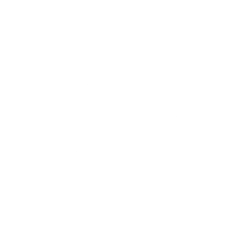

In [ ]:
from socket import *
s = socket(AF_INET,SOCK_STREAM)
s.connect(("www.vesit.ves.ac.in",80)) # Connect
s.send(b'GET /index.html HTTP/1.1\n\n') # Send request
data = s.recv(10000) # Get response
print(data)
s.close()

In [ ]:
from socket import *
s = socket(AF_INET,SOCK_STREAM)
s.connect(("www.google.com",80)) # Connect
s.send(b'GET /index.html HTTP/1.1\n\n') # Send request
data = s.recv(10000) # Get response
print(data)
s.close()

b'HTTP/1.1 200 OK\r\nDate: Wed, 09 Mar 2022 06:18:47 GMT\r\nExpires: -1\r\nCache-Control: private, max-age=0\r\nContent-Type: text/html; charset=ISO-8859-1\r\nP3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."\r\nServer: gws\r\nX-XSS-Protection: 0\r\nX-Frame-Options: SAMEORIGIN\r\nSet-Cookie: 1P_JAR=2022-03-09-06; expires=Fri, 08-Apr-2022 06:18:47 GMT; path=/; domain=.google.com; Secure\r\nSet-Cookie: NID=511=p_0OLuHU3wD1LFOskwGhTwgWzMc8kFRFQJomeGsMAQIS2fTtm8S6hPNw2ldz58IFYam7DDoSzl9PIwXey5D8m6ticTvtRr1bmDc5XIk77tRdw91Q3xjT-DGiTQc9VVNN3fIlWCBpdWh24ohyl3HMzKqqFwWfO827yu4bZX510fg; expires=Thu, 08-Sep-2022 06:18:47 GMT; path=/; domain=.google.com; HttpOnly\r\nAccept-Ranges: none\r\nVary: Accept-Encoding\r\nTransfer-Encoding: chunked\r\n\r\n2000\r\n<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you fin

# **4. Simple Client Server Program**

**TCP Server Program**
* Run the program in the Command Prompt (Windows) / Terminal (Linux)
>> python TCP_Server.py

In [ ]:
# TCP_Server Program
# Save the file as "TCP_Server.py"
from socket import *
s = socket(AF_INET,SOCK_STREAM)
s.bind(("localhost",9001))
#s.bind(("",9000))
s.listen(5)
while True:
 c,a = s.accept()
 print ("Received connection from", a)
 message = "Hello : " + str(a[1])
 c.send(message.encode())
 c.close()

* TCP Server listening to Client requests

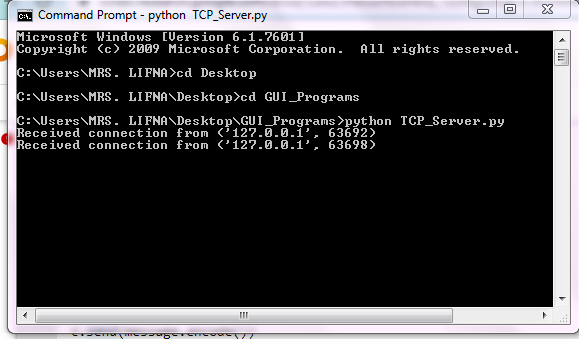

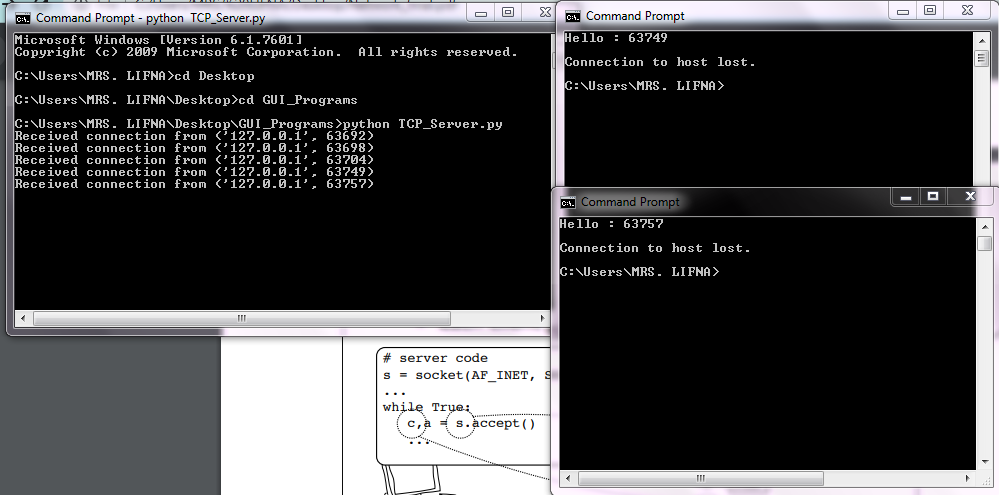

* TCP Server listening to multiple Telnet clients

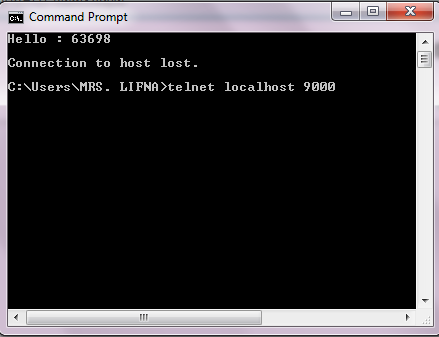

**Telnet Client**
* On a new Command Prompt (Windows) / Terminal (Linux) type the following command
>> telnet localhost 9000

# **5. TCP Client & Server Communication**

* TCP Server Program

In [ ]:
# TCP Server
# ==========
import socket

# Creatin a TCP/IP socket
serversock = socket.socket(socket.AF_INET,socket.SOCK_STREAM)

# Binding the socket to the port
serveraddress = ('localhost',12345)

print("Starting the server on %s port %s" % serveraddress)
serversock.bind(serveraddress)

# Listening to the incoming connections
serversock.listen(1)

while True:
    # Waiting for a new connection
     print("Waiting for a connection from a client ... ")
     conn,clientaddress = serversock.accept()
     try:
         # Receiving the data fom the client and sending it again
         print("Received Connection from" ,clientaddress)
         while True:
             data = conn.recv(1024)
             print("Received data :", data.decode())
             if data:
                 print("Sending data back to the client.")
                 conn.sendall(data)
             else:
                 print("There is no more data.", clientaddress)
                 print("---------------")
                 break
     finally:
         # Closing the connection
         conn.close()

* TCP Server Listening to CLient requests

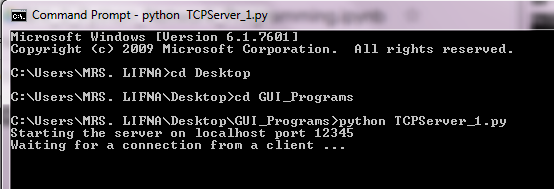

* TCP Client Program

In [ ]:
## TCP Client
## ==========
import socket

# Creating a TCP/ IP socket
clientsock = socket.socket(socket.AF_INET,socket.SOCK_STREAM)

# Connecting the socket to the server's port
serveraddress = ("localhost",12345)

print("Connecting to the port %s port %s of server" % serveraddress)
clientsock.connect(serveraddress)

try:
    # Sending data
    senddata = ("This is Socket Programming in Python.")
    print("Sending the message.... %s" % senddata)
    clientsock.sendall(senddata.encode('utf-8'))

    # Receiving data
    recvdata = clientsock.recv(1024)
    print("Received data : %s" % recvdata.decode())

finally:
 # Closing the connection
 print("Closing the socket!!")
 clientsock.close()

*  TCP Client getting response from Server

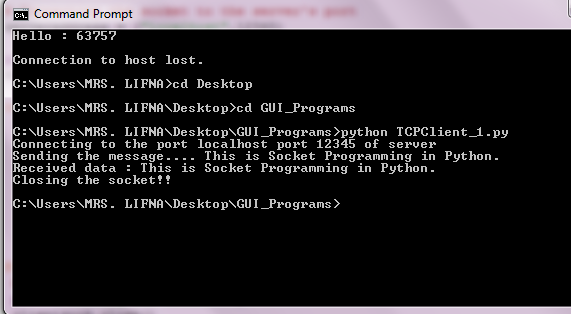

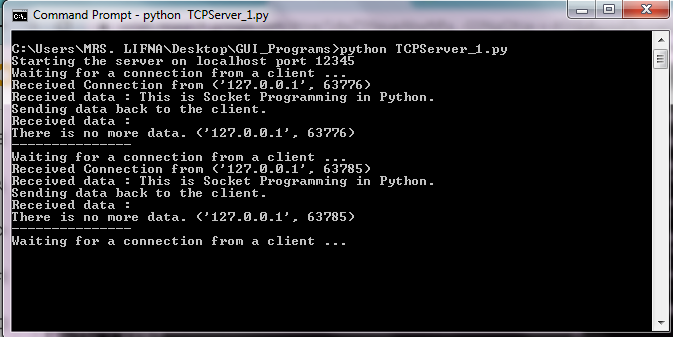

# **Online Materials**
1. https://www.hellocodeclub.com/how-to-fix-typeerror-a-bytes-like-object-is-required-not-str/#Solution_1
2. [To enable Telnet Service](https://social.technet.microsoft.com/wiki/contents/articles/38433.windows-10-enabling-telnet-client.aspx)